In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("./input"))
import folium
import folium.plugins
from folium import IFrame

['cities2.csv', 'Donations.csv', 'Donors.csv', 'Projects.csv', 'Resources.csv', 'Schools.csv', 'statelatlong.csv', 'US Zip Codes from 2013 Government Data.csv']


In [2]:
donations = pd.read_csv('./input/Donations.csv')
donors = pd.read_csv('./input/Donors.csv', low_memory = False)
schools = pd.read_csv('./input/Schools.csv', error_bad_lines = False)
teachers = pd.read_csv('./input/Teachers.csv', error_bad_lines = False)
projects = pd.read_csv('./input/Projects.csv', error_bad_lines = False, warn_bad_lines = False, \
                       parse_dates=["Project Posted Date", "Project Fully Funded Date"])
resources = pd.read_csv('./input/Resources.csv', error_bad_lines=False, warn_bad_lines=False)

In [3]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [4]:
print("Minimum Donation Amount is : $", donations['Donation Amount'].min())
print("Maximum Donation Amount is : $", donations['Donation Amount'].max())
print("Average Donated Amount is : $", donations['Donation Amount'].mean())
print("Median Donated Amount is : $", donations['Donation Amount'].median())

Minimum Donation Amount is : $ 0.01
Maximum Donation Amount is : $ 60000.0
Average Donated Amount is : $ 60.66878857923583
Median Donated Amount is : $ 25.0


Text(0.5,1,'Donations Distribution')

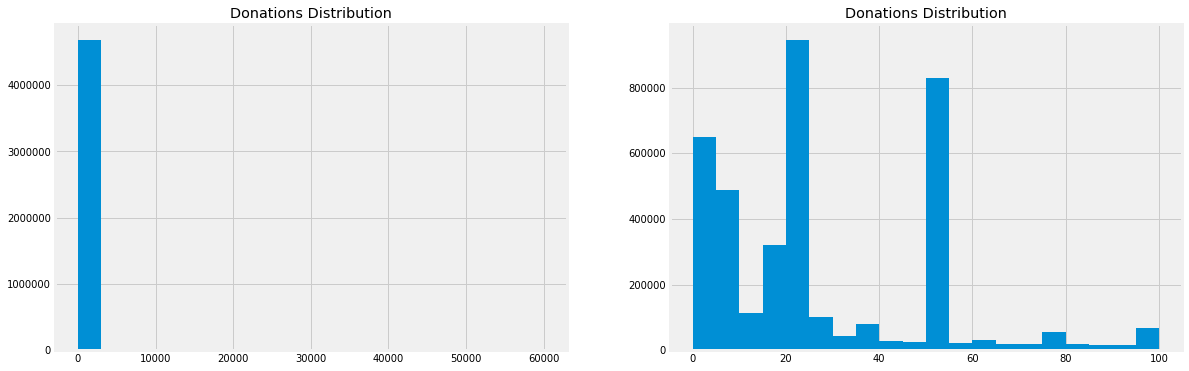

In [5]:
f, ax = plt.subplots(1,2, figsize=(18,6))
donations[donations['Donation Amount']>0]['Donation Amount'].hist(bins=20, ax=ax[0])
donations[(donations['Donation Amount']>0.0) & (donations['Donation Amount']<100)]['Donation Amount'].hist(bins = 20, ax = ax[1])
ax[0].set_title('Donations Distribution')
ax[1].set_title('Donations Distribution')

Text(0.5,1,'Optional Amount Included?')

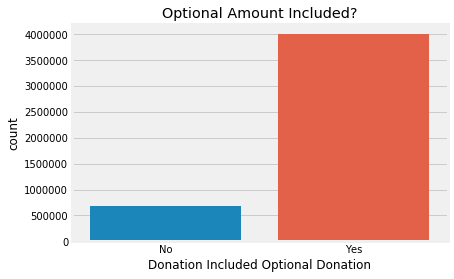

In [7]:
sns.countplot(donations['Donation Included Optional Donation'])
plt.title('Optional Amount Included?')

In [11]:
print('DonorsChoos.org has received donations from: ', donors.shape[0], 'donors')
repeat = donations['Donor ID'].value_counts().to_frame()
print('There are', repeat[repeat['Donor ID'] > 1].shape[0], 'repeating donors')

DonorsChoos.org has received donations from:  2122640 donors


There are 552941 repeating donors


Text(0.5,1,'Top Donating Cities')

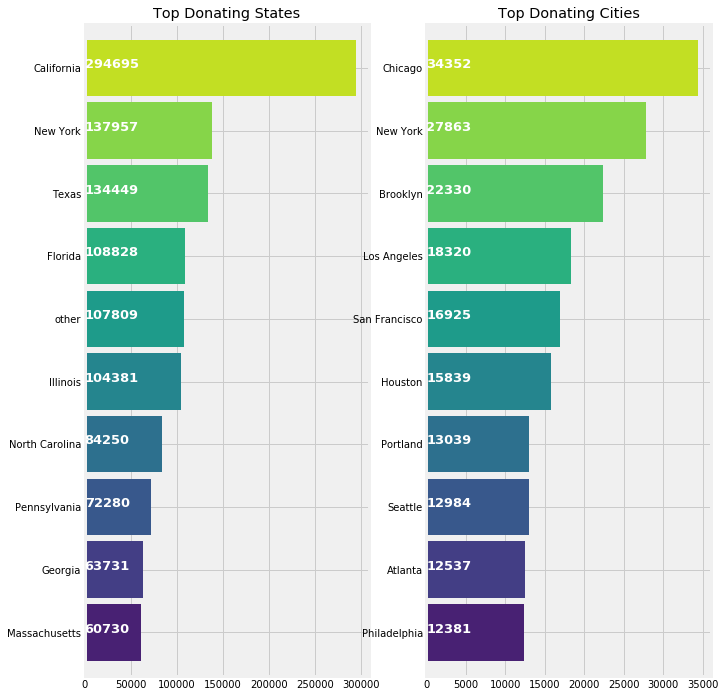

In [15]:
f,ax = plt.subplots(1,2, figsize=(10,12))
donors['Donor State'].value_counts()[:10].plot.barh(ax = ax[0], width = 0.9, color = sns.color_palette('viridis_r', 10))
donors['Donor City'].value_counts()[:10].plot.barh(ax=ax[1], width = 0.9, color = sns.color_palette('viridis_r', 10))
for i, v in enumerate(donors['Donor State'].value_counts()[:10].values) :
    ax[0].text(.5, i, v, fontsize = 13, color = 'white', weight = 'bold')
ax[0].invert_yaxis()
ax[0].set_title("Top Donating States")
for i, v in enumerate(donors['Donor City'].value_counts()[:10].values) :
    ax[1].text(.5,i,v, fontsize=13, color = 'white', weight = 'bold')
ax[1].invert_yaxis()
ax[1].set_title('Top Donating Cities')